# Describing Data

### What do you find in this notebook?

In this exercise, first, you will familiarize yourself with the Python libraries 'statsmodels' and 'SciPy' that let you do statistical analysis: calculate descriptive statistics, sample datapoints, study relationships between variables, and perform hypothesis testing. Then, second, you will work on a set of exercises that will let you practice your skills.

Here we show a couple of examples of how to do common analyses, but there are many more useful probability distributions and statistical tests. In the linked documentation, you will find complete information, and a lot more details compared to what is outlined in this notebook:
- [statsmodels](https://www.statsmodels.org/stable/examples/index.html), [more complete documentation](https://www.statsmodels.org/stable/stats.html)
- [SciPy](https://docs.scipy.org/doc/scipy/reference/stats.html)

# Tutorial: How to use the libraries

- You will be working with the full US 2015 census dataset (acs2015_county_data.csv, available at https://www.kaggle.com/muonneutrino/us-census-demographic-data#acs2015_county_data.csv). Here we load it. Take some time to familiarize yourself with the contents. One row represents one county.

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

#load the statistical libraries
from statsmodels.stats import diagnostic
from scipy import stats

In [2]:
data_folder = './data/'
df = pd.read_csv(data_folder + 'acs2015_county_data.csv')

In [3]:
df.columns

Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [4]:
df.sample(10)

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
117,5013,Arkansas,Calhoun,5245,2692,2553,3.5,73.0,22.2,0.1,...,2.6,0.9,3.0,26.7,2243,74.9,17.7,7.4,0.0,7.2
935,20095,Kansas,Kingman,7790,3926,3864,3.0,94.2,0.1,0.9,...,5.1,3.3,6.7,21.9,3509,69.7,14.6,15.6,0.1,5.7
1420,28039,Mississippi,George,23104,11648,11456,2.3,87.9,7.9,0.3,...,1.0,2.4,1.5,35.8,8260,81.8,12.7,5.3,0.2,9.0
2030,38081,North Dakota,Sargent,3874,2038,1836,2.6,94.6,1.1,0.6,...,7.7,2.6,9.0,14.2,2078,73.9,13.3,11.6,1.1,1.2
794,19011,Iowa,Benton,25803,12888,12915,1.3,96.8,0.7,0.0,...,3.8,1.9,5.1,23.9,13080,79.5,13.0,7.4,0.1,4.7
681,17173,Illinois,Shelby,22115,11012,11103,0.9,97.6,0.5,0.2,...,1.2,0.8,5.8,22.8,9895,82.4,10.2,7.5,0.0,6.2
484,13197,Georgia,Marion,8739,4394,4345,7.2,58.6,31.5,0.0,...,0.9,3.3,0.2,31.4,3219,58.8,30.4,10.8,0.0,14.3
836,19095,Iowa,Iowa,16344,8097,8247,2.2,96.0,0.8,0.0,...,4.5,0.5,6.1,22.1,8818,72.7,17.4,9.7,0.2,1.8
1168,22111,Louisiana,Union,22533,11112,11421,4.3,68.1,25.8,0.0,...,1.1,0.7,2.7,32.9,8096,84.3,10.7,4.9,0.2,7.7
1141,22057,Louisiana,Lafourche,97474,47888,49586,4.3,77.0,13.3,2.3,...,1.3,4.7,2.5,26.8,43542,82.1,12.0,5.8,0.2,7.0


- We will focus first on income per capita across counties.

<Axes: >

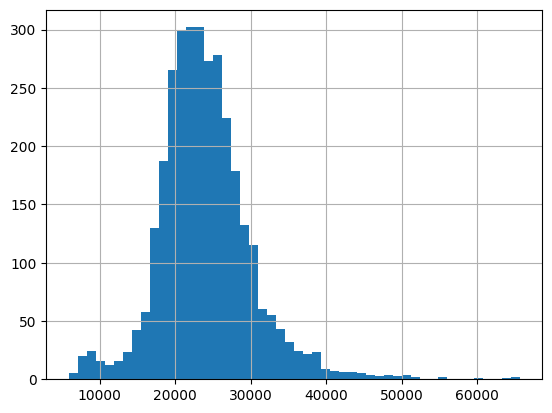

In [5]:
df['IncomePerCap'].hist(bins = 50)

### 1. Calculating descriptive statisctics

- Let's calculate basic descriptive statistics of the income per capita.

In [6]:
df['IncomePerCap'].describe()

count     3220.000000
mean     23981.771739
std       6204.339960
min       5878.000000
25%      20238.500000
50%      23460.000000
75%      27053.250000
max      65600.000000
Name: IncomePerCap, dtype: float64

- What distribution does the data come from? Here is how we can test the goodness of the fit.

In [7]:
# does the data come from a normal distrbution?
diagnostic.kstest_normal(df['IncomePerCap'].values, dist = 'norm')

(0.0637621121184162, 0.0009999999999998899)

- p_value < 0.05 -> we can reject the null hypothesis that the data comes from a normal distribution!

In [8]:
#how about exponential?
diagnostic.kstest_normal(df['IncomePerCap'].values, dist = 'exp')

(0.433243770582646, 0.0009999999999998899)

- p < 0.05 -> not exponential either!

### 2. How to sample the data

- Often we need to find random samples from the dataset. We can do so conveniently with pandas wrappers.

In [27]:
#make 10 samples with replacement
sample1_counties = df.sample(n = 10, replace = True)

#make 10 samples without replacement
sample1_counties = df.sample(n = 10, replace = False)

#sometimes we want to sample in an ublanaced way, so that we upsample datapoints of certain characteristic,
#and downsample the others. this can be acieved with weights parameter
#here we sample by upsampling counties with large population
sample2_counties = df.sample(n = 10, replace = False, weights = df['TotalPop'])

In [28]:
#on avergage, the samples in the sample produce with reveighting now have higher population, as we wanted!
print(sample1_counties['TotalPop'].mean())
print(sample2_counties['TotalPop'].mean())

91209.9
1024774.6


### 3. Examining relationship between two variables

- Is income per capita of a county correlated with the unemployment?

In [29]:
stats.pearsonr(df['IncomePerCap'],df['Employed'])

PearsonRResult(statistic=0.2646136320394489, pvalue=9.942215354240727e-53)

- There is a small (0.26), but significant (p < 0.05) positive correlation.

In [30]:
stats.spearmanr(df['IncomePerCap'],df['Employed'])

SignificanceResult(statistic=0.30770631560595474, pvalue=1.415296431173735e-71)

- Spearman rank coorrelation is also significant.

### 4. Hypothesis testing

- Is income per capita higher in New York counties compared to California counties?

In [31]:
df.loc[df['State'] == 'New York']['IncomePerCap'].mean()

28189.75806451613

In [32]:
df.loc[df['State'] == 'California']['IncomePerCap'].mean()

27902.603448275862

- We see that there is a ~300$ gap. Quite a lot!
- But is it significantly higher? Let's use a t-test. This is a two-sided test for the null hypothesis that the two independent samples have identical average (expected) values. 

In [33]:
stats.ttest_ind(df.loc[df['State'] == 'New York']['IncomePerCap'], df.loc[df['State'] == 'California']['IncomePerCap'])

TtestResult(statistic=0.19788117232375713, pvalue=0.8434785239169611, df=118.0)

- p is not smaller than 0.05 -> we cannot reject the null hypothesis that the income is the same -> there is no significant difference

### 5. How to measure uncertainty
- Now we see the importance of mesuring uncertainty and indicating it on data visualizations.
- Visual inspection of 95% confidence intervals lets us see that the difference is not significant (the errorbars are overlapping).

(25000.0, 32000.0)

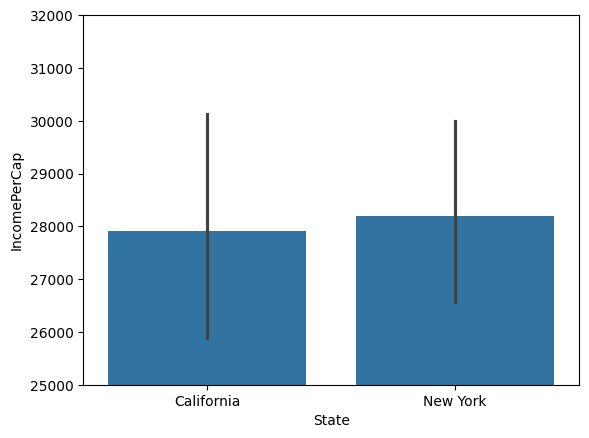

In [34]:
ax = sns.barplot(x="State", y="IncomePerCap", data=df.loc[df['State'].isin(['New York','California'])])
plt.ylim([25000,32000])

# Exercise 1: Boosting the economy by incentivizing self-employment

Assume the biggest priority of the local government in 2018 is to increase per-capita income. To do so, the officials plan to adopt a strategy for incentivizing self-employment through a series of campaigns, educational programs, and dedicated funds.

Since it is unethical and impossible in this setting to run a controlled experiment involving citizens (e.g., fire employees and force them to self-employ), the officials have asked you, the data scientist, to establish the effect of self-employment on the economy, relying on observational data.

**A)** Using suitable methods, determine and quantify the dependency between the percentage of self-employed citizens and per capita income across all 3,212 US counties. Do citizens in counties that have a higher percentage of self-employed people earn more per capita?

In [35]:
### your code and or answer here ###

# Calculate Pearson correlation
pearson_corr, pearson_p_value = stats.pearsonr(df['IncomePerCap'], df['SelfEmployed'])
print(f"Pearson correlation: {pearson_corr}, p-value: {pearson_p_value}")

# Calculate Spearman correlation
spearman_corr, spearman_p_value = stats.spearmanr(df['IncomePerCap'], df['SelfEmployed'])
print(f"Spearman correlation: {spearman_corr}, p-value: {spearman_p_value}")


Pearson correlation: 0.08727386609551788, p-value: 7.052861196524368e-07
Spearman correlation: 0.056413673053189874, p-value: 0.0013623847564714516


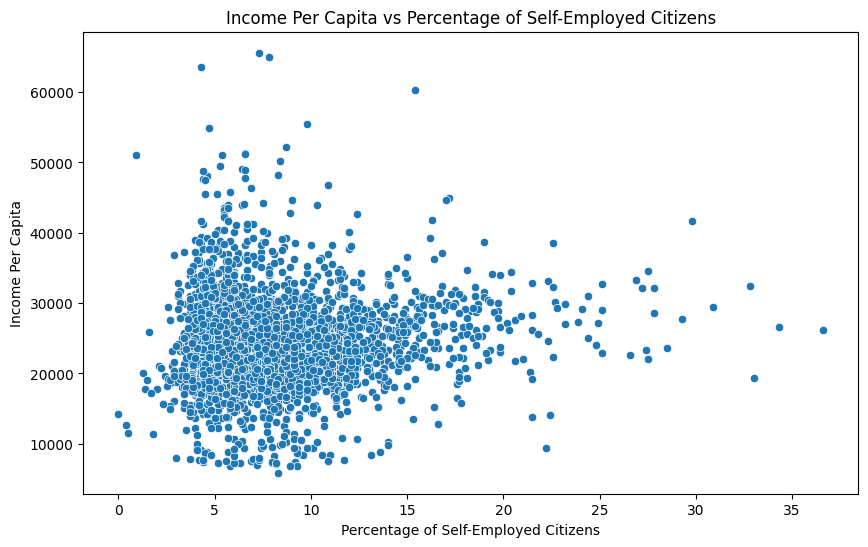

In [36]:
# Scatter plot for visual inspection
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SelfEmployed', y='IncomePerCap', data=df)
plt.xlabel('Percentage of Self-Employed Citizens')
plt.ylabel('Income Per Capita')
plt.title('Income Per Capita vs Percentage of Self-Employed Citizens')
plt.show()


**B)** The pilot program will involve all counties within a limited set of three US states. Set A includes Wisconsin, Tennessee, and  Minnesota. Quantify the dependency of per-capita income on self-employment rates across all the counties in set A.

Pearson correlation (Set A): -0.202293507365215, p-value: 0.0011881639322138895
Spearman correlation (Set A): -0.23669790001033852, p-value: 0.00014010090313655094


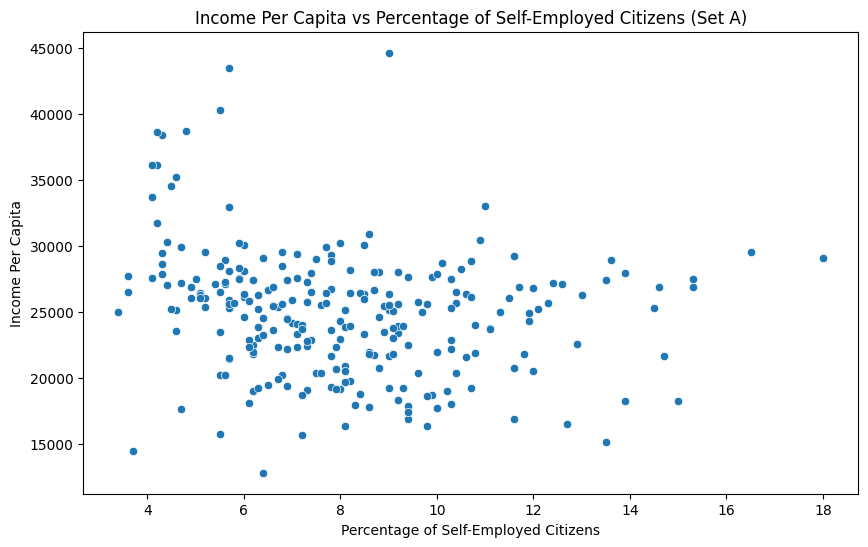

In [37]:
### your code and or answer here ###

# Filter dataset to only include counties in Wisconsin, Tennessee, and Minnesota
set_a_states = ['Wisconsin', 'Tennessee', 'Minnesota']
df_set_a = df[df['State'].isin(set_a_states)]

# Calculate Pearson correlation
pearson_corr_a, pearson_p_value_a = stats.pearsonr(df_set_a['IncomePerCap'], df_set_a['SelfEmployed'])
print(f"Pearson correlation (Set A): {pearson_corr_a}, p-value: {pearson_p_value_a}")

# Calculate Spearman correlation
spearman_corr_a, spearman_p_value_a = stats.spearmanr(df_set_a['IncomePerCap'], df_set_a['SelfEmployed'])
print(f"Spearman correlation (Set A): {spearman_corr_a}, p-value: {spearman_p_value_a}")

# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SelfEmployed', y='IncomePerCap', data=df_set_a)
plt.xlabel('Percentage of Self-Employed Citizens')
plt.ylabel('Income Per Capita')
plt.title('Income Per Capita vs Percentage of Self-Employed Citizens (Set A)')
plt.show()

# The relationship is statistically significant, suggesting that in these counties, higher self-employment rates are associated with slightly lower income per capita

**C)** In which state within set A is the observed effect of self-employment on per-capita income the strongest?

In [38]:
### your code and or answer here ###

# Define the states in set A
set_a_states = ['Wisconsin', 'Tennessee', 'Minnesota']

# Loop through each state to calculate correlations
for state in set_a_states:
    df_state = df[df['State'] == state]
    
    # Calculate Pearson correlation for each state
    pearson_corr, pearson_p_value = stats.pearsonr(df_state['IncomePerCap'], df_state['SelfEmployed'])
    print(f"Pearson correlation ({state}): {pearson_corr}, p-value: {pearson_p_value}")
    
    # Calculate Spearman correlation for each state
    spearman_corr, spearman_p_value = stats.spearmanr(df_state['IncomePerCap'], df_state['SelfEmployed'])
    print(f"Spearman correlation ({state}): {spearman_corr}, p-value: {spearman_p_value}")
    print('-' * 50)
    
# Wisconsin.


Pearson correlation (Wisconsin): -0.32905300016378525, p-value: 0.004768134887745209
Spearman correlation (Wisconsin): -0.4635129104404941, p-value: 4.124859155565996e-05
--------------------------------------------------
Pearson correlation (Tennessee): -0.23836048684913153, p-value: 0.02001163195552803
Spearman correlation (Tennessee): -0.316991392780988, p-value: 0.0017487582457931404
--------------------------------------------------
Pearson correlation (Minnesota): -0.2538551921654062, p-value: 0.017665199300912
Spearman correlation (Minnesota): -0.21107460598245847, p-value: 0.04970805582462062
--------------------------------------------------


**D)** Set B includes New Jersey, Kansas, and Rhode Island. Repeat the analysis from steps B and C above, but now for set B. In which of the two sets A and B (if any) would you recommend incentivizing self-employment? Explain your reasoning. Hint: It is useful to add a notion of confidence to your results and explore the data visually.

Pearson correlation (Set B): -0.2322214134608569, p-value: 0.007607493042857355
Spearman correlation (Set B): -0.16010624610827853, p-value: 0.06773890774775307


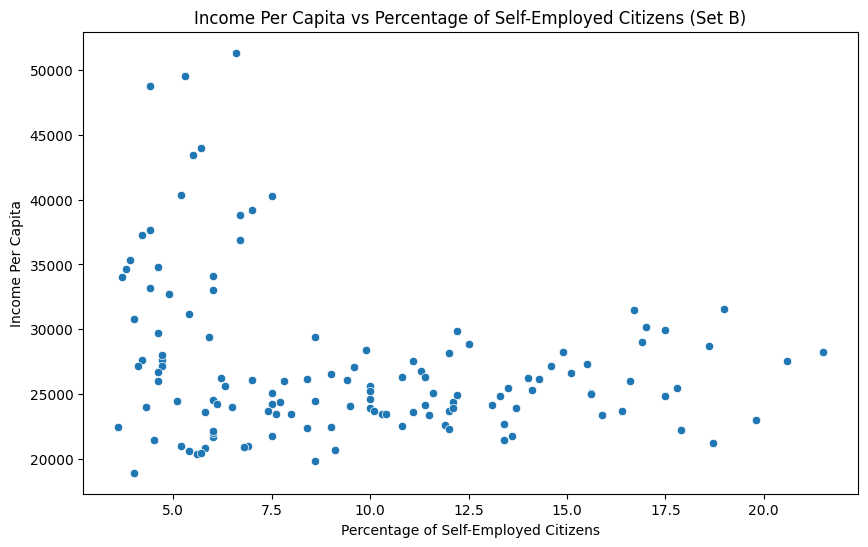

In [39]:
### your code and or answer here ###

# Define the states in set B
set_b_states = ['New Jersey', 'Kansas', 'Rhode Island']

# Filter dataset to only include counties in Set B
df_set_b = df[df['State'].isin(set_b_states)]

# Calculate Pearson correlation for Set B
pearson_corr_b, pearson_p_value_b = stats.pearsonr(df_set_b['IncomePerCap'], df_set_b['SelfEmployed'])
print(f"Pearson correlation (Set B): {pearson_corr_b}, p-value: {pearson_p_value_b}")

# Calculate Spearman correlation for Set B
spearman_corr_b, spearman_p_value_b = stats.spearmanr(df_set_b['IncomePerCap'], df_set_b['SelfEmployed'])
print(f"Spearman correlation (Set B): {spearman_corr_b}, p-value: {spearman_p_value_b}")

# Scatter plot for Set B
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SelfEmployed', y='IncomePerCap', data=df_set_b)
plt.xlabel('Percentage of Self-Employed Citizens')
plt.ylabel('Income Per Capita')
plt.title('Income Per Capita vs Percentage of Self-Employed Citizens (Set B)')
plt.show()


In [40]:
# Loop through each state in set B to calculate correlations
for state in set_b_states:
    df_state = df[df['State'] == state]
    
    # Calculate Pearson correlation for each state
    pearson_corr, pearson_p_value = stats.pearsonr(df_state['IncomePerCap'], df_state['SelfEmployed'])
    print(f"Pearson correlation ({state}): {pearson_corr}, p-value: {pearson_p_value}")
    
    # Calculate Spearman correlation for each state
    spearman_corr, spearman_p_value = stats.spearmanr(df_state['IncomePerCap'], df_state['SelfEmployed'])
    print(f"Spearman correlation ({state}): {spearman_corr}, p-value: {spearman_p_value}")
    print('-' * 50)


Pearson correlation (New Jersey): 0.4804478471336282, p-value: 0.027488944757806263
Spearman correlation (New Jersey): 0.4040346017736601, p-value: 0.06929493068926951
--------------------------------------------------
Pearson correlation (Kansas): 0.25810299714436913, p-value: 0.007853351846832462
Spearman correlation (Kansas): 0.28392575483491556, p-value: 0.0033332825399419903
--------------------------------------------------
Pearson correlation (Rhode Island): 0.9021788382149806, p-value: 0.03618310201575908
Spearman correlation (Rhode Island): 0.9999999999999999, p-value: 1.4042654220543672e-24
--------------------------------------------------


# Exercise 2. Data visualization and read the stats comprehension and interpretation questions.

- As part of the quizes, two homeworks and the final exam, you will be at times asked to interpret your result based on the understanding of underlying concepts. The questions below can help you practice and get a sense of how well you understand the concepts covered in the class so far. Can you answer these questions confidently?

### Question 1. The yearly salaries (in thousands of CHF) of 7000 people are summarized in the following box plot. If the 20th percentile of the salaries is 110,000, how many people earn between 110,000 and 114,000?

- a) 2100
- b) 700
- c) 350
- d) 70

<img src="boxplot.png" style="width: 400px;" align="left"/>

In [21]:
### your code and or answer here ###

# 5% of 7000 = 350

### Question 2. What visualizations are suitable for getting insights about the distribution of a single continuous variable?

- a) Barplot and histogram
- b) Boxplot and histogram
- c) Scatterplot and boxplot
- d) Barplot, boxplot, and histogram

In [22]:
### your code and or answer here ###

# b)

### Question 3. In a new groundbreaking study, 28 out of 100 patients reported improvements after taking a new medicine. It is known that, when given a placebo, 20% of the patients report feeling better. What is the p-value assuming the null hypothesis that the probability of successful treatment in this groundbreaking study is the same as the probability of reporting feeling better under placebo, according to a one-sided binomial test? Hint: you may use the statsmodels.stats.proportion.binom_test function.

- a) 0.00034
- b) 0.0034
- c) 0.034
- d) 0.34

In [41]:
### your code and or answer here ###

from statsmodels.stats.proportion import binom_test

# Given data
n_successes = 28
n_trials = 100
p_null = 0.20  # Null hypothesis: the success rate is equal to placebo rate

# Perform one-sided binomial test
p_value = binom_test(n_successes, n_trials, p_null, alternative='larger')
print(f"P-value: {p_value}")


P-value: 0.03415162963907485


### Question 4. The 95% confidence interval of the average height of 1000 people using bootstrap resampling with 10000 bootstrap samples is calculated by:

- a) Sampling 1000 height values with replacement and computing the mean. This is repeated 10000 times to create a sorted list of the 10000 means. The CI is defined by the 500th and the 9500th value in sorted order.
- b) Sampling 10000 height values without replacement and computing the mean. This is repeated 1000 times to create a sorted list of the 1000 means. The CI is defined by the 25th and the 975th value in sorted order.
- c) Sampling 1000 height values with replacement and computing the mean. This is repeated 10000 times to create a sorted list of the 10000 means. The CI is defined by the 250th and the 9750th value in sorted order.
- d) Sampling 1000 height values without replacement and computing the mean. This is repeated 10000 times to create a sorted list of the 10000 means. The CI is defined by the 500th and the 9500th value in sorted order.

### Implement your bootstrapping function that you will use in the rest of the course. It should take an array and the number of iterations as inputs, and output 95% confidence intervals of the mean.

In [43]:
import numpy as np

def bootstrap_ci(data, n_iterations=10000, confidence_level=0.95):
    # Store the means from each bootstrap sample
    bootstrap_means = []
    
    n = len(data)
    
    for _ in range(n_iterations):
        # Sample with replacement
        sample = np.random.choice(data, size=n, replace=True)
        # Calculate the mean of the sample
        bootstrap_means.append(np.mean(sample))
    
    # Sort the bootstrap means
    bootstrap_means = sorted(bootstrap_means)
    
    # Calculate the percentiles for the confidence interval
    lower_percentile = (1 - confidence_level) / 2
    upper_percentile = 1 - lower_percentile
    
    # Get the values at the lower and upper percentiles
    lower_index = int(lower_percentile * n_iterations)
    upper_index = int(upper_percentile * n_iterations)
    
    ci_lower = bootstrap_means[lower_index]
    ci_upper = bootstrap_means[upper_index]
    
    return ci_lower, ci_upper

# Example usage
data = np.random.normal(170, 10, size=1000)  # Generate sample height data
ci = bootstrap_ci(data, n_iterations=10000, confidence_level=0.95)
print(f"95% Confidence Interval of the mean: {ci}")


95% Confidence Interval of the mean: (168.98424473324195, 170.24645718637674)


### Question 5. A study conducted at EPFL revealed a negative Spearman’s correlation between GPA and entry-level job salary. Which of the following statements is true?

- a) There could be a positive Spearman’s correlation between GPA and entry-level job salary in every single department of EPFL.
- b) Spearman correlation between GPA and entry-level job salary in every single department has to be positive.
- c) Across all levels, as opposed to entry-level only, higher GPA scores are associated with higher job salaries.
- d) We can infer that finishing EPFL with a higher GPA causes you to have a lower entry-level job salary.

In [25]:
### your code and or answer here ###

# a)

### Question 6. The average number of requests per page during a day on a large website is 200, while the median is 15. 

- a) You can assume that the distribution is heavy-tailed.
- b) You are dealing with a left-skewed distribution.
- c) Half of the pages get more than 200 requests.
- d) None of the above.

In [26]:
### your code and or answer here ###

# a)